In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import linregress

In [17]:
df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


[-0.5421240249263661,
 -0.4790794409142336,
 -0.41603485690208686,
 -0.3529902728899543,
 -0.2899456888778218,
 -0.22690110486568926,
 -0.16385652085355673,
 -0.1008119368414242,
 -0.037767352829277456,
 0.025277231182855076,
 0.08832181519498761,
 0.15136639920712014,
 0.21441098321925267,
 0.2774555672313852,
 0.34050015124351773,
 0.4035447352556645,
 0.466589319267797,
 0.5296339032799295,
 0.5926784872920621,
 0.6557230713041946,
 0.7187676553163271,
 0.7818122393284739,
 0.8448568233406064,
 0.9079014073527389,
 0.9709459913648715,
 1.033990575377004,
 1.0970351593891365,
 1.1600797434012833,
 1.2231243274134158,
 1.2861689114255483,
 1.3492134954376809,
 1.4122580794498134,
 1.475302663461946,
 1.5383472474740927,
 1.6013918314862252,
 1.6644364154983577,
 1.7274809995104903,
 1.7905255835226228,
 1.8535701675347553,
 1.9166147515468879,
 1.9796593355590346,
 2.042703919571167,
 2.1057485035832997,
 2.168793087595432,
 2.2318376716075647,
 2.2948822556196973,
 2.357926839631844,

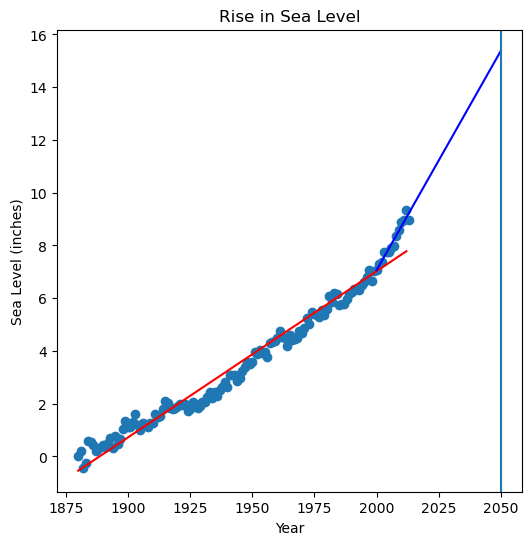

In [48]:
# Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axix.
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

# Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. 
# Make the line go through the year 2050 to predict the sea level rise in 2050.
# Create first line of best fit
reg = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

    # Create first line of best fit
x_pred = pd.Series([i for i in range(df['Year'].min(), df['Year'].max())])
y_pred = reg.slope * x_pred + reg.intercept
plt.plot(x_pred, y_pred, 'red')

    # Create second line of best fit
last_df = df.loc[df['Year'] >= 2000]

last_reg = linregress(last_df['Year'], last_df['CSIRO Adjusted Sea Level'])
last_x_pred = pd.Series([i for i in range(2000, 2051)])
last_y_pred = last_reg.slope * last_x_pred + last_reg.intercept
plt.plot(last_x_pred, last_y_pred, 'blue')
plt.axvline(2050)

    # Add labels and title
  
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level')

last_df
actual = ax.get_lines()[0].get_ydata().tolist()
actual